<a href="https://colab.research.google.com/github/yogee2406/Breast-cancer-ML_Yogeeta.ipynb/blob/main/NLP_project_on_Disaster_Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES AND LOAD DATA

In [ ]:
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/disaster_train_data.csv')
test_df = pd.read_csv('/content/disaster_test_data.csv')

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# for text processing 
import re

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train_df.shape

(5709, 5)

# Data Description

*   id - a unique identifier for each tweet
*   text - the text of the tweet
*   location - the location the tweet was sent from (may be blank)
*   keyword - a particular keyword from the tweet (may be blank)
*   target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)



In [ ]:
train_df.head()

,id,keyword,location,text,target
0,7345,obliterate,"Dover, DE",@dicehateme @PuppyShogun This makes sense. Pap...,0
1,9081,structural%20failure,"ÌÏT: 27.9136024,-81.6078532",'@CatoInstitute: The causes of federal failure...,0
2,4920,exploded,"Elmwood Park, NJ",Well as I was chaning an iPad screen it fuckin...,0
3,10265,war%20zone,Host of #MindMoversPodcast,the war on drugs has turned the U.S. into a WA...,1
4,10083,typhoon,NaN,Obama Declares Disaster for Typhoon-Devastated...,1


In [ ]:
#Get the number of null values for each column of train dataset
train_df.isnull().sum()

id             0
keyword       47
location    1886
text           0
target         0
dtype: int64

Column “location” has very missing data. It has values that are not related to location. So I drop this column

In [ ]:
# we can drop location column as it contains info of location from where tweets were done
train = train_df.drop(columns = ['location'],axis=1)
train.head()

,id,keyword,text,target
0,7345,obliterate,@dicehateme @PuppyShogun This makes sense. Pap...,0
1,9081,structural%20failure,'@CatoInstitute: The causes of federal failure...,0
2,4920,exploded,Well as I was chaning an iPad screen it fuckin...,0
3,10265,war%20zone,the war on drugs has turned the U.S. into a WA...,1
4,10083,typhoon,Obama Declares Disaster for Typhoon-Devastated...,1


0    3251
1    2458
Name: target, dtype: int64


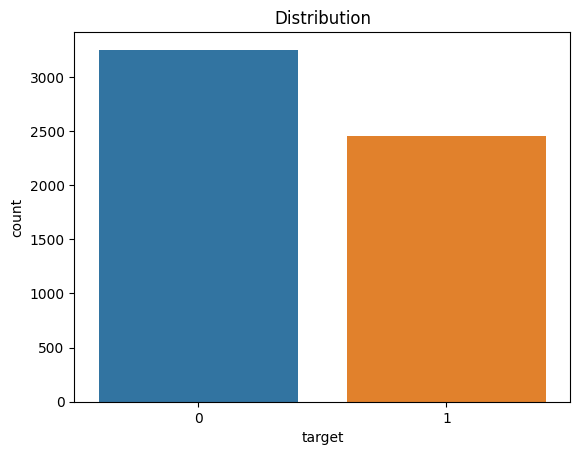

In [ ]:
# Visualization of the frequency distribution of the 'target' variable
sns.countplot(x='target', data=train)
plt.title('Distribution');

print(train['target'].value_counts())

## TEXT PREPROCESSING

In [ ]:
# text cleaning
def text_cleaner(each_text):
    
    #  the most common words in any natural language
    stop_words = set(stopwords.words('english'))
    
    # to reduce extra characters from a word to its root or base of a word
    stemmer = SnowballStemmer('english') 
    
    # remove URL from text
    each_text_no_url = re.sub(r"http\S+", "", each_text)
    
    # remove numbers from text
    text_no_num = re.sub(r'\d+', '', each_text_no_url)

    # tokenize the word using nltk  
    my_text = nltk.word_tokenize(each_text)

    # remove not english characters, lower case and remove the white space at end 
    my_text = re.sub('[^A-Za-z]+', " ", each_text).lower().strip()

    # remove stop words 
    my_text = [word for word in my_text.split() if word not in stop_words]

    # stemming
    my_text = [stemmer.stem(word) for word in my_text]

    # convert back to sentence
    my_text = ' '.join(my_text)

    return my_text

In [ ]:
train.head()

,id,keyword,text,target
0,7345,obliterate,@dicehateme @PuppyShogun This makes sense. Pap...,0
1,9081,structural%20failure,'@CatoInstitute: The causes of federal failure...,0
2,4920,exploded,Well as I was chaning an iPad screen it fuckin...,0
3,10265,war%20zone,the war on drugs has turned the U.S. into a WA...,1
4,10083,typhoon,Obama Declares Disaster for Typhoon-Devastated...,1


# MODEL

We will use MultinomialNB classifier, It's a Naive Bayes classifier for multinomial models.

Implementing CountVectorizer

We'll use CountVectorizer to count the words in each tweet and turn them into a set of numbers that a machine learning model can work with. Then we will create vectors for all of our tweets.

In [ ]:
y = train['target']
X = train.drop('target', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

vectors_train = vectorizer.fit_transform(X_train['text'])

vectors_train.shape

(3825, 68750)

In [ ]:
clf = MultinomialNB(alpha=.01)

#  Train the classifier
clf.fit(vectors_train, y_train)

# Get the test vectors
vectors_valid = vectorizer.transform(X_valid['text'])


 # Predict and score the vectors
pred = clf.predict(vectors_valid)

acc_score = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred, average='macro')
recall = metrics.recall_score(y_valid, pred)


print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))
print(f"Recall: {recall}")

Total accuracy classification score: 0.7653927813163482
Total F1 classification score: 0.7585128114114303
Recall: 0.7186700767263428


Confusion matrix [[880 222]
 [220 562]]


Text(50.722222222222214, 0.5, 'True')

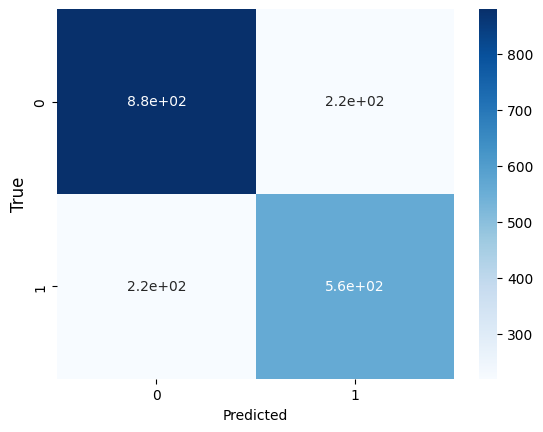

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_valid, pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

Implementing TfidfVectorizer

Taking only word count in document its not enough. There are many stopwords and rare words looks very sparse, hence less importance. To tackle these problems, we use TF-IDF vectorization. TF-IDF are word frequency scores that try to highlight the words that are most interesting.

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)
tf_vectors_train = tf_vectorizer.fit_transform(X_train['text'])

clf = MultinomialNB(alpha=.01)

#  Train the classifier
clf.fit(tf_vectors_train, y_train)

# Get the test vectors
tf_vectors_valid = tf_vectorizer.transform(X_valid['text'])

# Predict and score the vectors
pred = clf.predict(tf_vectors_valid)

acc_score = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred, average='macro')
recall = metrics.recall_score(y_valid, pred)

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))
print(f"Recall: {recall}")

Total accuracy classification score: 0.772823779193206
Total F1 classification score: 0.76460669696446
Recall: 0.7058823529411765


Confusion matrix [[904 198]
 [230 552]]


Text(50.722222222222214, 0.5, 'True')

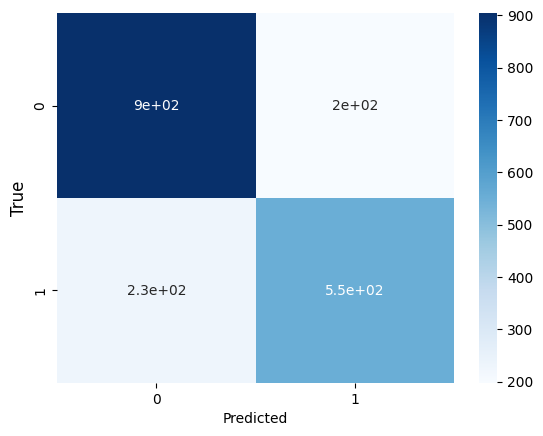

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_valid, pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

# Running model on test data

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)
vectors = vectorizer.fit_transform(X['text'])
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, y)

MultinomialNB(alpha=0.01)

# checking score on test data

In [ ]:
df = pd.DataFrame()
df['id'] = test_df['id']
vectors_test = vectorizer.transform(test_df['text'])
df['target'] = clf.predict(vectors_test)

In [ ]:
df.head()

,id,target
0,3796,0
1,3185,0
2,7769,0
3,191,0
4,9810,0


In [ ]:
df.to_csv('submission_MultinomialNB.csv',index=False)

# Conclusion:

Target:  This denotes whether a tweet is about a real disaster (1) or not (0)

0	Tweet is not related to Disaster(Negative)
1	Tweet is related to Disaster(Positive)

The value of the target in the test dastset shows '0' value which means the tweet is not a real disaster (Negative)
